In [1]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time

#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#fig_post_def()

In [2]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
    plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
    mpl.rcParams.update(new_rc_params)
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()

In [3]:
def sorting(input_data, bin_number ,lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center,hist

In [4]:


folder = "../../data/time_resolution/"
#folder = "../../../data/NSTOF_experiment_data/"

#raw_data_1  =np.loadtxt(folder+"20230411_AmBe_10hours.txt")
raw_data_1  =np.loadtxt(folder+"20230628Na22_Ch0_4_3cm_CFD88Pre100sm4_lsb15_24hr.txt")
raw_data_2  =np.loadtxt(folder+"20230628Na22_Ch0_4_3cm_LED68sm0_lsb35_24hr.txt")

#raw_data_2  =np.loadtxt(folder+"20230518_NaI_coincidence.txt") # low current 
#raw_data_3  =np.loadtxt(folder+"20230519_NaI_coincidence.txt")
#raw_data_4  =np.loadtxt(folder+"20230520_NaI_coincidence.txt")
#raw_data_1   =np.loadtxt(folder+"20230413_INER_TOF_CFD_2A_20min.txt")

raw_data = np.zeros(shape=6)
print(raw_data)
for i in range(1,2):
    #print(i)
    add = globals()["raw_data_"+str(i)]  # convert string to variable name
    print(add.shape)
    raw_data=np.vstack((raw_data,add))

#raw_data = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO_ch","Tri_Det","Tri_PSD","Tri_LO_ch"])
#raw_data = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO_ch","Tri_Det","Tri_LO_ch"])
raw_data = raw_data[1:,:]

print(raw_data.shape)

T_calibration = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO","Tri_Det","Tri_PSD","Tri_LO"])
T_calibration_LED = pd.DataFrame(raw_data_2,columns=["time_diff","Rec_PSD","Rec_LO","Tri_Det","Tri_PSD","Tri_LO"])

print(T_calibration)
print(T_calibration_LED)

[0. 0. 0. 0. 0. 0.]
(49363, 6)
(49363, 6)
       time_diff   Rec_PSD  Rec_LO  Tri_Det   Tri_PSD  Tri_LO
0          4.499  0.166667   114.0      4.0  0.189655   232.0
1          3.937  0.191257   183.0      4.0  0.146552   116.0
2          3.374  0.114286    70.0      4.0  0.178899   218.0
3          5.781  0.131313    99.0      4.0  0.157371   502.0
4          4.376  0.193103   145.0      4.0  0.150000   160.0
...          ...       ...     ...      ...       ...     ...
49358      4.752  0.175879   199.0      4.0  0.172093   215.0
49359      4.112  0.127660    94.0      4.0  0.179104   201.0
49360      3.136  0.166667    96.0      4.0  0.165000   200.0
49361      4.304  0.188235    85.0      4.0  0.113821   123.0
49362      3.312  0.175644   427.0      6.0  0.188406   207.0

[49363 rows x 6 columns]
       time_diff   Rec_PSD  Rec_LO  Tri_Det   Tri_PSD  Tri_LO
0          8.250  0.280000    50.0      4.0  0.208000   125.0
1         -0.093  0.173410   173.0      4.0  0.274194    62.0
2 

(0.0, 750.0)

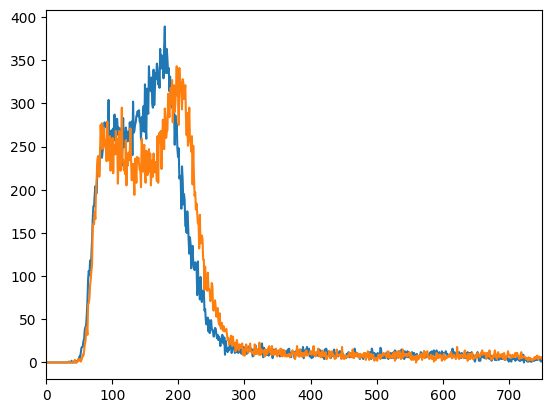

In [5]:
Rec_LO_x , Rec_LO_y   = sorting(T_calibration['Rec_LO'],2000,0,2000)
Tri_LO_x , Tri_LO_y   = sorting(T_calibration['Tri_LO'],2000,0,2000)
plt.plot(Rec_LO_x , Rec_LO_y )
plt.plot(Tri_LO_x , Tri_LO_y )
plt.xlim(0,750)

In [6]:
mask_Rec_LO = T_calibration['Rec_LO']>50
mask_Tri_LO = T_calibration['Tri_LO']>50

mask_Rec_LO_LED = T_calibration_LED['Rec_LO']>50
mask_Tri_LO_LED = T_calibration_LED['Tri_LO']>50


T_calibration = T_calibration[(mask_Rec_LO&mask_Tri_LO)]
T_calibration_LED = T_calibration_LED[(mask_Rec_LO_LED&mask_Tri_LO_LED)]
print(T_calibration.shape)

(49326, 6)


In [10]:
bin_center_02ns    , T_calibration_hist_02ns   = sorting(T_calibration['time_diff'],2*5*20,-20,20)
bin_center_02ns_LED, T_calibration_hist_02ns_LED  = sorting(T_calibration_LED['time_diff'],2*5*20,-20,20)


bar_x_02ns,bar_y_02ns = bar_plot(bin_center_02ns , T_calibration_hist_02ns,0.2)
bar_x_02ns_LED,bar_y_02ns_LED = bar_plot(bin_center_02ns_LED , T_calibration_hist_02ns_LED,0.2)

popt_02ns = gauss_fit_wo_baseline(bar_x_02ns,bar_y_02ns)
popt_02ns_LED = gauss_fit_wo_baseline(bar_x_02ns_LED,bar_y_02ns_LED)
print("popt_1ns:  ",popt_02ns,popt_02ns[2]*2.355)
print("popt_0.5ns:  ",popt_02ns_LED,popt_02ns_LED[2]*2.355)
gauss_x = np.arange(-2,12,0.01)
gauss_y_02ns  = gauss_wo_baseline(gauss_x,   popt_02ns[0],popt_02ns[1],popt_02ns[2])
gauss_y_02ns_LED = gauss_wo_baseline(gauss_x,  popt_02ns_LED[0],popt_02ns_LED[1],popt_02ns_LED[2])

fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
divider = 100
plt.plot(bar_x_02ns,bar_y_02ns /divider     ,'--k' ,alpha = 1,label='CFD')
plt.plot(gauss_x,gauss_y_02ns /divider     ,'g' ,alpha = 1,label='CFD fitting')

plt.plot(bar_x_02ns_LED,bar_y_02ns_LED/divider,'--b',label='LED')
plt.plot(gauss_x,gauss_y_02ns_LED/divider,'r',label='LED fitting')
#plt.plot(bar_x_05ns,bar_y_05ns   ,'r' ,label='binning 0.5 ns')
#plt.plot(bar_x_02ns,bar_y_02ns   ,'g' ,label='binning 0.2 ns')
#plt.plot(bar_x_01ns,bar_y_01ns   ,'k' ,label='binning 0.1 ns')


fig_post_def(xlim=(-1,11),xticks=(1,0.5)
             ,ylim=(0,80),yticks=(20,10)
             ,lg_fs=9,ylabel="counts (x100)",xlabel="time difference (ns)",title ='Na-22')
plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/Na22_TR_comparison.svg', format="svg")

NameError: name 'gauss_fit_wo_baseline' is not defined

In [11]:
bin_center_1ns , T_calibration_hist_1ns   = sorting(T_calibration['time_diff'],2*1*20,-20,20)
bin_center_05ns, T_calibration_hist_05ns  = sorting(T_calibration['time_diff'],2*2*20,-20,20)
bin_center_02ns, T_calibration_hist_02ns  = sorting(T_calibration['time_diff'],2*5*20,-20,20)
bin_center_01ns, T_calibration_hist_01ns  = sorting(T_calibration['time_diff'],2*10*20,-20,20)




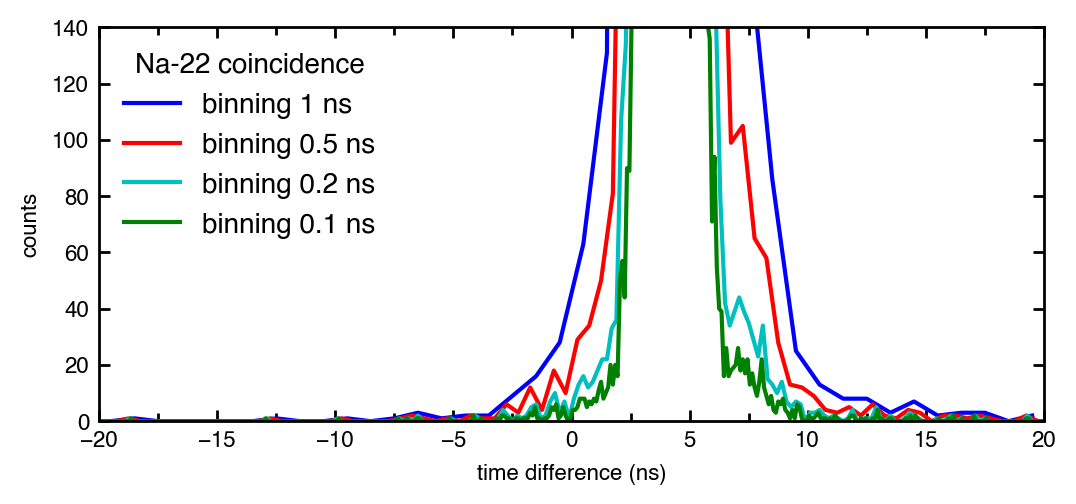

In [12]:
fig = fig_pre_def(12,5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bin_center_1ns , T_calibration_hist_1ns   ,'b' ,label='binning 1 ns')
plt.plot(bin_center_05ns, T_calibration_hist_05ns  ,'r' ,label='binning 0.5 ns')
plt.plot(bin_center_02ns, T_calibration_hist_02ns  ,'c' ,label='binning 0.2 ns')
plt.plot(bin_center_01ns, T_calibration_hist_01ns  ,'g' ,label='binning 0.1 ns')

#plt.plot(bin_center, hist2 ,label='delay 2us')
#plt.plot(bin_center, hist3 )
#plt.plot(bin_center, hist4 ,label='delay 7 us')

fig_post_def(xlim=(-20,20),xticks=(5,2.5)
             ,ylim=(0,140)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22 coincidence')


In [13]:
def bar_plot(input_x,input_y,binning):
    xs = [input_x[0] - binning/2]
    ys = [0]
    for i in range(len(input_x)):
        xs.append(input_x[i] - binning/2)
        xs.append(input_x[i] + binning/2)
        ys.append(input_y[i])
        ys.append(input_y[i])
    xs.append(input_x[-1] + binning/2)
    ys.append(0)
    return np.array(xs),np.array(ys)

In [14]:
bar_x_1ns,bar_y_1ns   = bar_plot(bin_center_1ns , T_calibration_hist_1ns,1)
bar_x_05ns,bar_y_05ns = bar_plot(bin_center_05ns , T_calibration_hist_05ns,0.5)
bar_x_02ns,bar_y_02ns = bar_plot(bin_center_02ns , T_calibration_hist_02ns,0.2)
bar_x_01ns,bar_y_01ns = bar_plot(bin_center_01ns , T_calibration_hist_01ns,0.1)

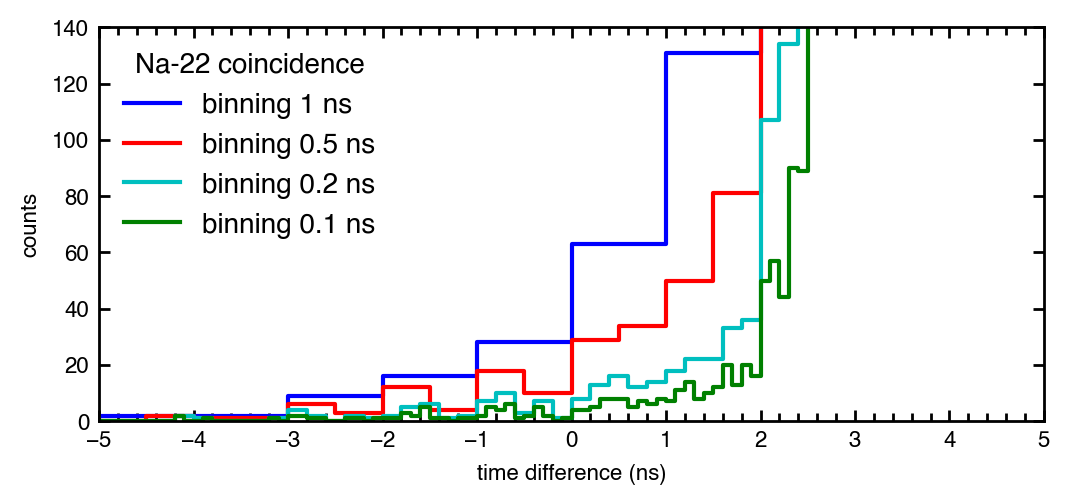

In [15]:
fig = fig_pre_def(12,5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bar_x_1ns,bar_y_1ns     ,'b' ,label='binning 1 ns')
plt.plot(bar_x_05ns,bar_y_05ns   ,'r' ,label='binning 0.5 ns')
plt.plot(bar_x_02ns,bar_y_02ns   ,'c' ,label='binning 0.2 ns')
plt.plot(bar_x_01ns,bar_y_01ns   ,'g' ,label='binning 0.1 ns')

#plt.plot(bin_center, hist2 ,label='delay 2us')
#plt.plot(bin_center, hist3 )
#plt.plot(bin_center, hist4 ,label='delay 7 us')

fig_post_def(xlim=(-5,5),xticks=(1,0.2)
             ,ylim=(0,140)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22 coincidence')


# fitting 

In [16]:

from scipy.optimize import curve_fit,fmin
from scipy.optimize import least_squares
import numpy
import pylab

def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit_wo_baseline(x, y):  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    try:  
        popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
        return popt
    except RuntimeError:
        print("Error - curve_fit failed")
        return  [0,mean,sigma]

In [17]:
popt_1ns = gauss_fit_wo_baseline(bin_center_1ns, T_calibration_hist_1ns)
popt_05ns = gauss_fit_wo_baseline(bin_center_05ns, T_calibration_hist_05ns)
popt_02ns = gauss_fit_wo_baseline(bin_center_02ns, T_calibration_hist_02ns)
popt_01ns = gauss_fit_wo_baseline(bin_center_01ns, T_calibration_hist_01ns)
print("popt_1ns:  ",popt_1ns,popt_1ns[2]*2.355)
print("popt_0.5ns:  ",popt_05ns,popt_05ns[2]*2.355)
print("popt_0.2ns:  ",popt_02ns,popt_02ns[2]*2.355)
print("popt_0.1ns:  ",popt_01ns,popt_01ns[2]*2.355)

popt_1ns:   [2.79007578e+04 4.20968280e+00 6.89482487e-01] 1.6237312565751432
popt_0.5ns:   [ 1.54541737e+04  4.19176389e+00 -6.13589710e-01] -1.4450037661912842
popt_0.2ns:   [ 6.34879951e+03  4.17718262e+00 -5.96534136e-01] -1.4048378894195324
popt_0.1ns:   [ 3.16471006e+03  4.17718663e+00 -6.00759392e-01] -1.4147883676325284


In [18]:
gauss_x = np.arange(0,10,0.01)

gauss_y_1ns  = gauss_wo_baseline(bin_center_1ns,   popt_1ns[0],popt_1ns[1],popt_1ns[2])
gauss_y_05ns = gauss_wo_baseline(gauss_x,  popt_05ns[0],popt_05ns[1],popt_05ns[2])
gauss_y_02ns = gauss_wo_baseline(bin_center_02ns,  popt_02ns[0],popt_02ns[1],popt_02ns[2])
gauss_y_01ns = gauss_wo_baseline(bin_center_01ns,  popt_01ns[0],popt_01ns[1],popt_01ns[2])


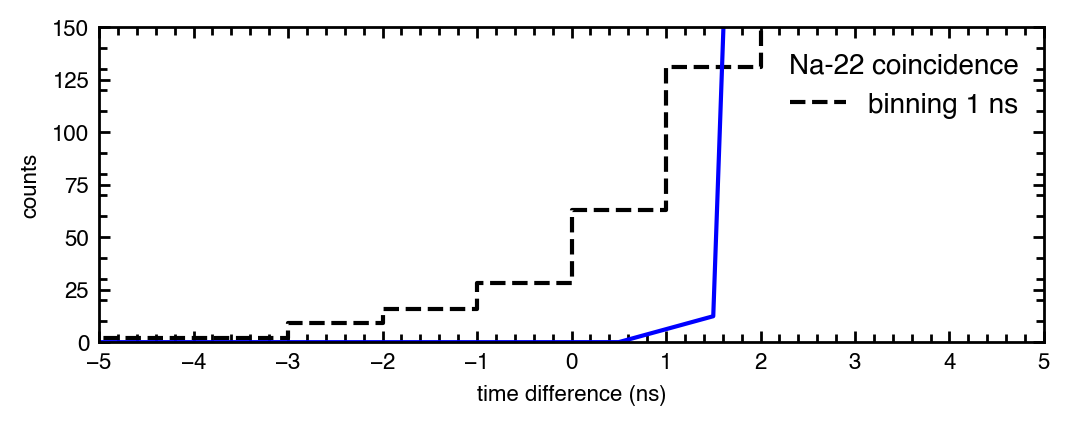

In [19]:
fig = fig_pre_def(12,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bar_x_1ns,bar_y_1ns     ,'--k' ,alpha = 1,label='binning 1 ns')
plt.plot(bin_center_1ns,gauss_y_1ns,'b')

#plt.plot(bar_x_05ns,bar_y_05ns   ,'r' ,label='binning 0.5 ns')
#plt.plot(bar_x_02ns,bar_y_02ns   ,'g' ,label='binning 0.2 ns')
#plt.plot(bar_x_01ns,bar_y_01ns   ,'k' ,label='binning 0.1 ns')


fig_post_def(xlim=(-5,5),xticks=(1,0.2)
             ,ylim=(0,150),yticks=(25,10)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22 coincidence')


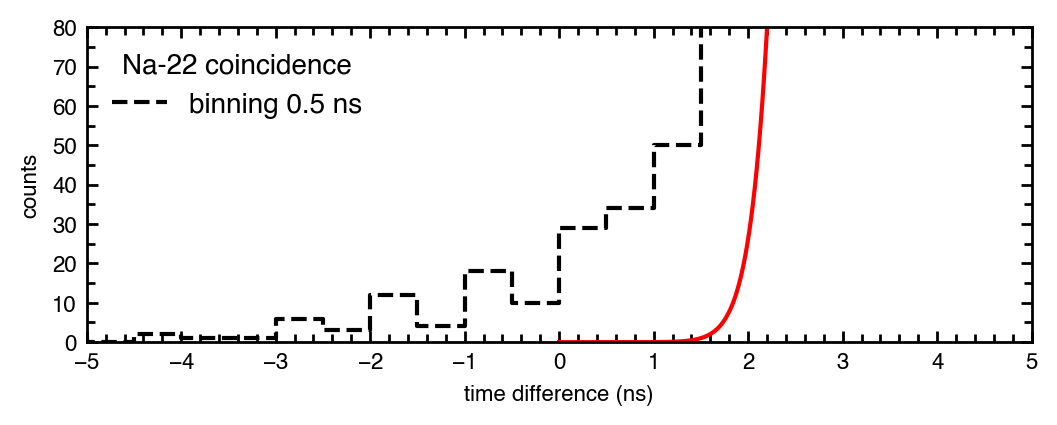

In [20]:
fig = fig_pre_def(12,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bar_x_05ns,bar_y_05ns     ,'--k' ,alpha = 1,label='binning 0.5 ns')
plt.plot(gauss_x,gauss_y_05ns,'r')

#plt.plot(bar_x_05ns,bar_y_05ns   ,'r' ,label='binning 0.5 ns')
#plt.plot(bar_x_02ns,bar_y_02ns   ,'g' ,label='binning 0.2 ns')
#plt.plot(bar_x_01ns,bar_y_01ns   ,'k' ,label='binning 0.1 ns')


fig_post_def(xlim=(-5,5),xticks=(1,0.2)
             ,ylim=(0,80),yticks=(10,5)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22 coincidence')


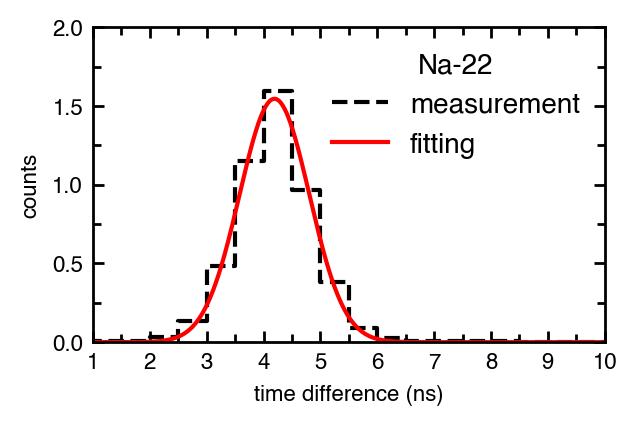

In [21]:
fig = fig_pre_def(6.5,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
divider = 10000
plt.plot(bar_x_05ns,bar_y_05ns/divider     ,'--k' ,alpha = 1,label='measurement')
plt.plot(gauss_x,gauss_y_05ns/divider,'r',label='fitting')

#plt.plot(bar_x_05ns,bar_y_05ns   ,'r' ,label='binning 0.5 ns')
#plt.plot(bar_x_02ns,bar_y_02ns   ,'g' ,label='binning 0.2 ns')
#plt.plot(bar_x_01ns,bar_y_01ns   ,'k' ,label='binning 0.1 ns')


fig_post_def(xlim=(1,10),xticks=(1,0.5)
             ,ylim=(0,2),yticks=(0.5,0.25)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22')

plt.savefig('/Users/thlin/Dropbox/PhD_thesis_博士論文/Figure/Na22_TR.svg', format="svg")

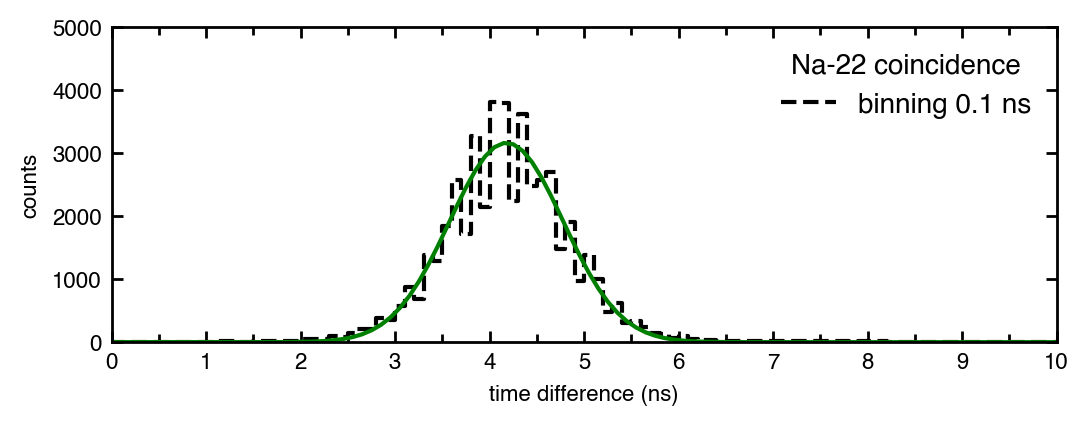

In [22]:
fig = fig_pre_def(12,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bar_x_01ns,bar_y_01ns     ,'--k' ,alpha = 1,label='binning 0.1 ns')
plt.plot(bin_center_01ns,gauss_y_01ns,'g')

#plt.plot(bar_x_05ns,bar_y_05ns   ,'r' ,label='binning 0.5 ns')
#plt.plot(bar_x_02ns,bar_y_02ns   ,'g' ,label='binning 0.2 ns')
#plt.plot(bar_x_01ns,bar_y_01ns   ,'k' ,label='binning 0.1 ns')


fig_post_def(xlim=(0,10),xticks=(1,0.5)
             ,ylim=(0,5000)#,yticks=(100,50)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22 coincidence')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'popt' is not defined

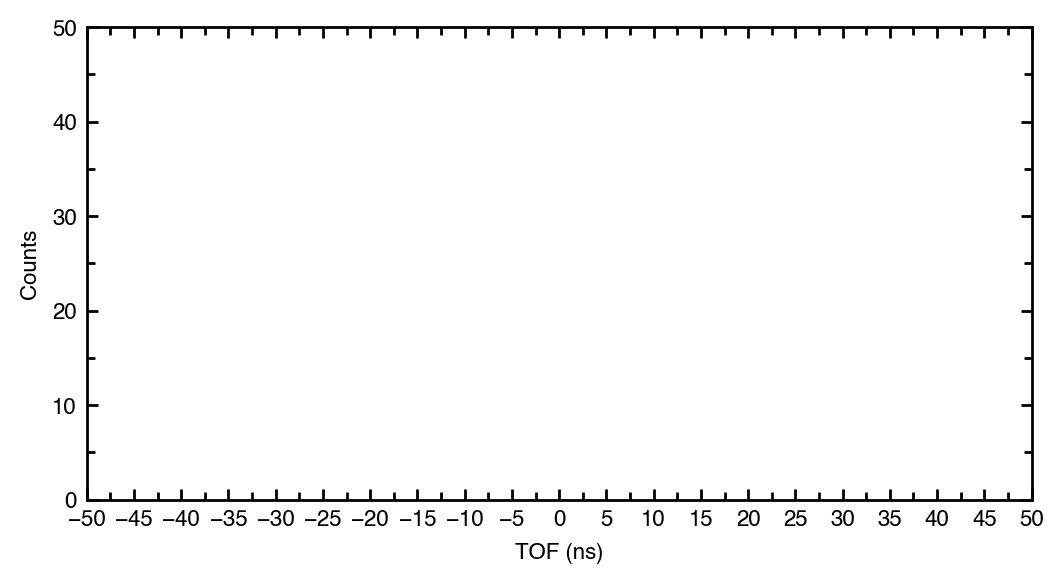

In [17]:
fig = fig_pre_def(12,6)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
time_calibration = 0


fig_post_def(xlim =(-50,50)
             ,xticks=(5,2.5)
             ,ylim = (0,50),yticks=(10,5)
             ,lg_fs=8,xlabel = 'TOF (ns)',ylabel = 'Counts')
print('time center : ', popt[1])

print('sigma = ', abs(popt[2]), '  FWHM = ', 2.355* abs(popt[2]) )


In [36]:


folder = "data/"
#folder = "../../../data/NSTOF_experiment_data/"

#raw_data_1  =np.loadtxt(folder+"20230411_AmBe_10hours.txt")
raw_data_1  =np.loadtxt(folder+"20230606_EG535_calibration_C_TTL_impedence50_1kHz_10min_W50.txt")
raw_data_2  =np.loadtxt(folder+"20230606_EG535_calibration_C_TTL_impedence50_1kHz_10min_F80.txt") # low current 
raw_data_3  =np.loadtxt(folder+"20230606_EG535_calibration_C_TTL_impedenceNo_1kHz_10min_w50.txt")
raw_data_4  =np.loadtxt(folder+"20230606_EG535_calibration_C_TTL_impedenceNo_1kHz_10min_F80.txt")
#raw_data_1   =np.loadtxt(folder+"20230413_INER_TOF_CFD_2A_20min.txt")

raw_data = np.zeros(shape=6)
print(raw_data)
for i in range(1,5):
    #print(i)
    add = globals()["raw_data_"+str(i)]  # convert string to variable name
    print(add.shape)
    raw_data=np.vstack((raw_data,add))

#raw_data = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO_ch","Tri_Det","Tri_PSD","Tri_LO_ch"])
#raw_data = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO_ch","Tri_Det","Tri_LO_ch"])
raw_data = raw_data[1:,:]

print(raw_data.shape)

T_calibration = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO","Tri_Det","Tri_PSD","Tri_LO"])



[0. 0. 0. 0. 0. 0.]
(46172, 6)
(46176, 6)
(46176, 6)
(46172, 6)
(184696, 6)


In [39]:
print(raw_data_1)

[[3.75000e+00 7.40702e-01 9.68000e+02 1.00000e+00 7.37218e-01 1.68200e+03]
 [3.34300e+00 7.42585e-01 9.44000e+02 1.00000e+00 7.37344e-01 1.67900e+03]
 [3.26500e+00 7.38366e-01 9.67000e+02 1.00000e+00 7.37344e-01 1.67900e+03]
 ...
 [2.96900e+00 7.31832e-01 9.77000e+02 1.00000e+00 7.37028e-01 1.69600e+03]
 [2.93800e+00 7.39042e-01 9.81000e+02 1.00000e+00 7.36904e-01 1.69900e+03]
 [3.24900e+00 7.36680e-01 9.76000e+02 1.00000e+00 7.36904e-01 1.69900e+03]]


In [92]:
binning_L =-50
binning_H =50
binning = 10*100
bin= 100/binning

bin_center_50Win , T_calibration_50Win   = sorting(raw_data_1[:,0],binning,binning_L,binning_H)
bin_center_50Free, T_calibration_50Free  = sorting(raw_data_2[:,0],binning,binning_L,binning_H)
bin_center_NoWin , T_calibration_NoWin   = sorting(raw_data_3[:,0],binning,binning_L,binning_H)
bin_center_NoFree, T_calibration_NoFree  = sorting(raw_data_4[:,0],binning,binning_L,binning_H)




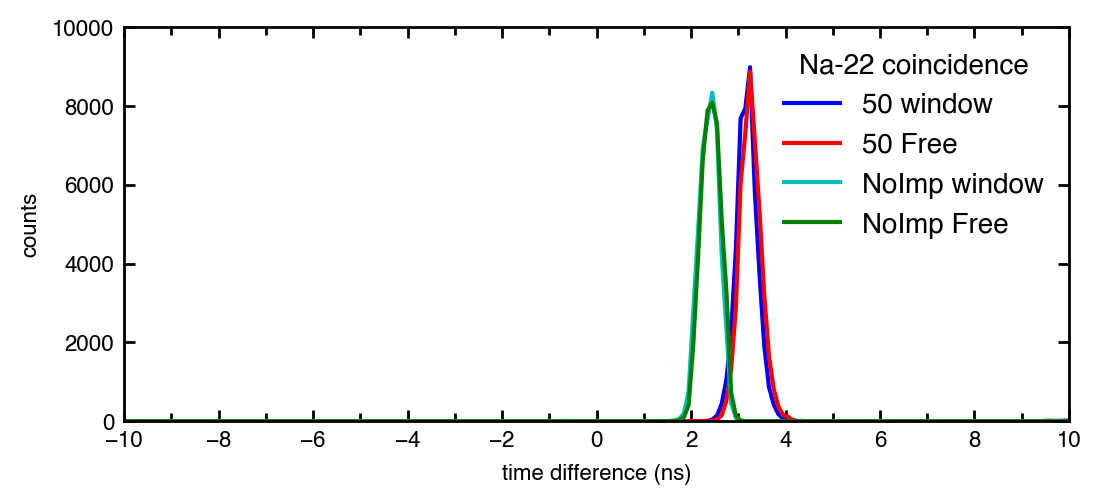

In [93]:
fig = fig_pre_def(12,5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bin_center_50Win , T_calibration_50Win   ,'b' ,label='50 window')
plt.plot(bin_center_50Free, T_calibration_50Free  ,'r' ,label='50 Free')
plt.plot(bin_center_NoWin , T_calibration_NoWin   ,'c' ,label='NoImp window')
plt.plot(bin_center_NoFree, T_calibration_NoFree  ,'g' ,label='NoImp Free')

#plt.plot(bin_center, hist2 ,label='delay 2us')
#plt.plot(bin_center, hist3 )
#plt.plot(bin_center, hist4 ,label='delay 7 us')

fig_post_def(xlim=(-10,10),xticks=(2,1)
             ,ylim=(0,10000)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22 coincidence')


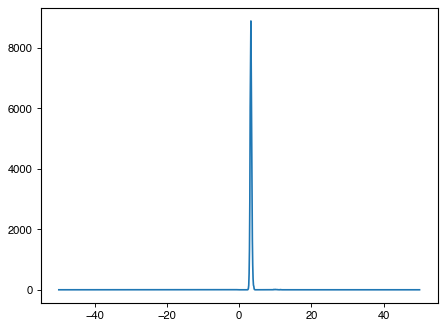

In [94]:
plt.plot(bin_center_50Free, T_calibration_50Free)

In [95]:
def bar_plot(input_x,input_y,binning):
    xs = [input_x[0] - binning/2]
    ys = [0]
    for i in range(len(input_x)):
        xs.append(input_x[i] - binning/2)
        xs.append(input_x[i] + binning/2)
        ys.append(input_y[i])
        ys.append(input_y[i])
    xs.append(input_x[-1] + binning/2)
    ys.append(0)
    return np.array(xs),np.array(ys)

In [96]:
bar_x_50Win ,bar_y_50Win  = bar_plot(bin_center_50Win , T_calibration_50Win   ,bin)
bar_x_50Free,bar_y_50Free = bar_plot(bin_center_50Free, T_calibration_50Free  ,bin)
bar_x_NoWin ,bar_y_NoWin  = bar_plot(bin_center_NoWin , T_calibration_NoWin   ,bin)
bar_x_NoFree,bar_y_NoFree = bar_plot(bin_center_NoFree, T_calibration_NoFree  ,bin)

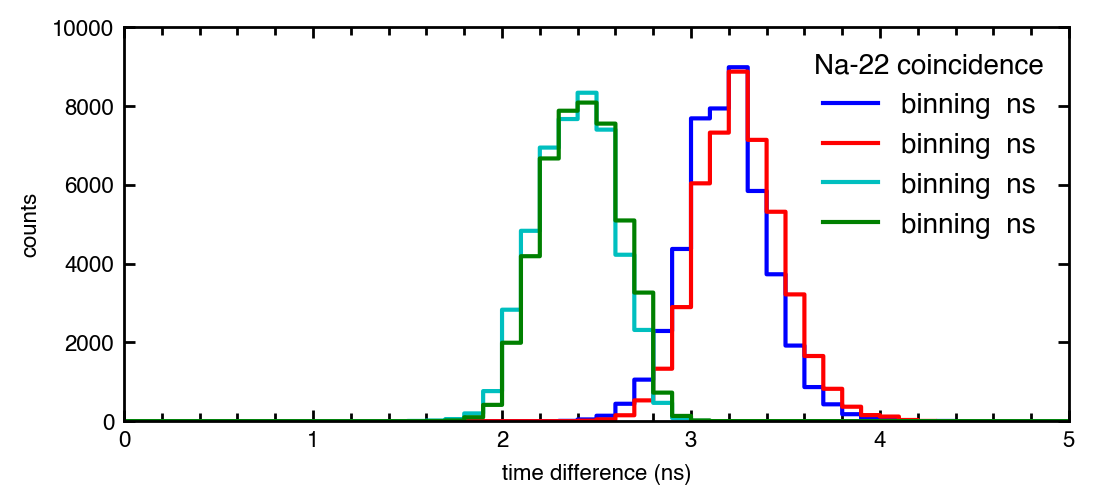

In [97]:
fig = fig_pre_def(12,5,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bar_x_50Win ,bar_y_50Win    ,'b' ,label='binning  ns')
plt.plot(bar_x_50Free,bar_y_50Free   ,'r' ,label='binning  ns')
plt.plot(bar_x_NoWin ,bar_y_NoWin    ,'c' ,label='binning  ns')
plt.plot(bar_x_NoFree,bar_y_NoFree   ,'g' ,label='binning  ns')

#plt.plot(bin_center, hist2 ,label='delay 2us')
#plt.plot(bin_center, hist3 )
#plt.plot(bin_center, hist4 ,label='delay 7 us')

fig_post_def(xlim=(0,5),xticks=(1,0.2)
             ,ylim=(0,10000)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22 coincidence')


# fitting 

In [98]:

from scipy.optimize import curve_fit,fmin
from scipy.optimize import least_squares
import numpy
import pylab

def gauss_wo_baseline(x,  A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def gauss_fit_wo_baseline(x, y):  
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    try:  
        popt, pcov = curve_fit(gauss_wo_baseline, x, y, p0=[1, mean, sigma], maxfev=1000)
        return popt
    except RuntimeError:
        print("Error - curve_fit failed")
        return  [0,mean,sigma]

In [99]:
popt_50F  = gauss_fit_wo_baseline(bin_center_50Free, T_calibration_50Free)

In [100]:
gauss_y_50F  = gauss_wo_baseline(bin_center_50Free,   popt_50F[0],popt_50F[1],popt_50F[2])
print(popt_50F)

[8.44467144e+03 3.24765344e+00 2.15004929e-01]


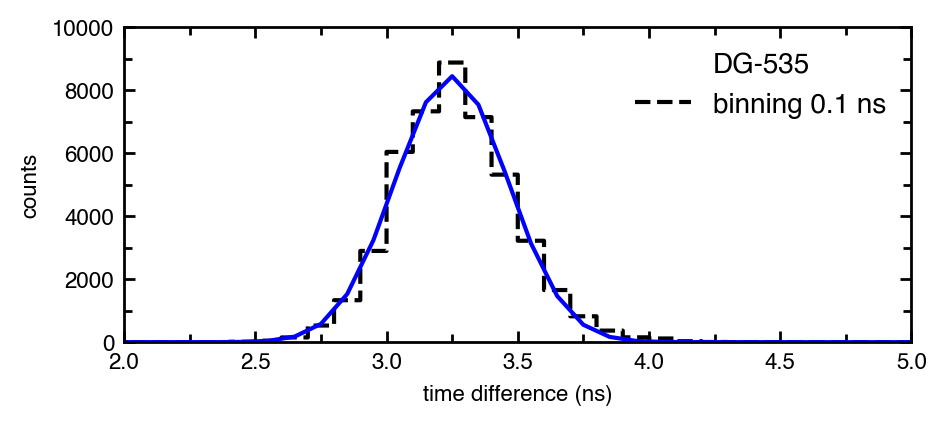

In [104]:
fig = fig_pre_def(10,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bar_x_50Free ,bar_y_50Free     ,'--k' ,alpha = 1,label='binning 0.1 ns')
plt.plot(bin_center_50Free, gauss_y_50F,'b')




fig_post_def(xlim=(2,5),xticks=(0.5,0.25)
             ,ylim=(0,10000),yticks=(2000,1000)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='DG-535')


In [102]:
print('time center : ', popt_50F[1])

print('sigma = ', abs(popt_50F[2]), '  FWHM = ', 2.355* abs(popt_50F[2]) )



time center :  3.2476534395414522
sigma =  0.21500492930903917   FWHM =  0.5063366085227873


In [ ]:
popt_1ns  = gauss_fit_wo_baseline(bin_center_1ns, T_calibration_hist_1ns)
popt_05ns = gauss_fit_wo_baseline(bin_center_05ns, T_calibration_hist_05ns)
popt_02ns = gauss_fit_wo_baseline(bin_center_02ns, T_calibration_hist_02ns)
popt_01ns = gauss_fit_wo_baseline(bin_center_01ns, T_calibration_hist_01ns)
print("popt_1ns:  ",popt_1ns,popt_1ns[2]*2.355)
print("popt_0.5ns:  ",popt_05ns,popt_05ns[2]*2.355)
print("popt_0.2ns:  ",popt_02ns,popt_02ns[2]*2.355)
print("popt_0.1ns:  ",popt_01ns,popt_01ns[2]*2.355)

popt_1ns:   [143.86634421  -1.1773334    1.26535846] 2.979919177259541
popt_0.5ns:   [73.9859213  -1.16783916  1.23132841] 2.8997784027465645
popt_0.2ns:   [29.69850755 -1.18248978  1.2321912 ] 2.901810265679157
popt_0.1ns:   [14.80958774 -1.18356771  1.23708494] 2.9133350258374726


In [ ]:
gauss_y_1ns  = gauss_wo_baseline(bin_center_1ns,   popt_1ns[0],popt_1ns[1],popt_1ns[2])
gauss_y_05ns = gauss_wo_baseline(bin_center_05ns,  popt_05ns[0],popt_05ns[1],popt_05ns[2])
gauss_y_02ns = gauss_wo_baseline(bin_center_02ns,  popt_02ns[0],popt_02ns[1],popt_02ns[2])
gauss_y_01ns = gauss_wo_baseline(bin_center_01ns,  popt_01ns[0],popt_01ns[1],popt_01ns[2])


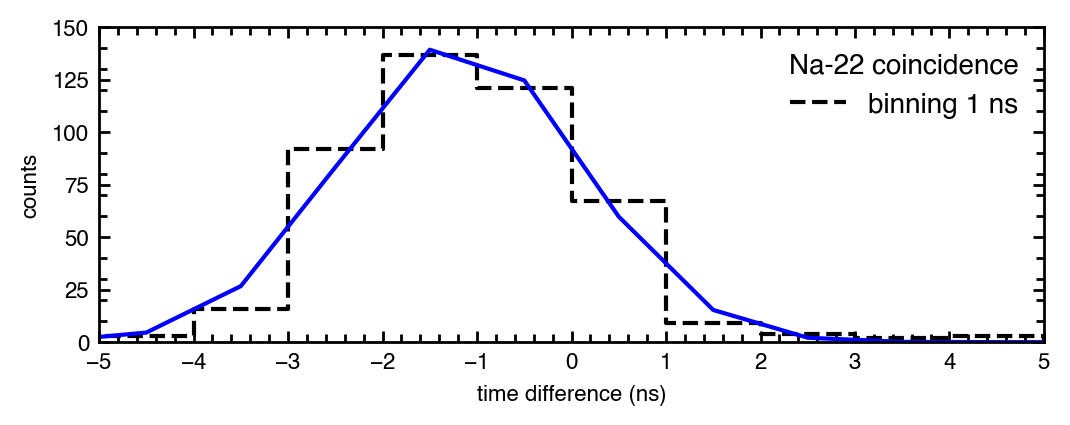

In [ ]:
fig = fig_pre_def(12,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bar_x_1ns,bar_y_1ns     ,'--k' ,alpha = 1,label='binning 1 ns')
plt.plot(bin_center_1ns,gauss_y_1ns,'b')

#plt.plot(bar_x_05ns,bar_y_05ns   ,'r' ,label='binning 0.5 ns')
#plt.plot(bar_x_02ns,bar_y_02ns   ,'g' ,label='binning 0.2 ns')
#plt.plot(bar_x_01ns,bar_y_01ns   ,'k' ,label='binning 0.1 ns')


fig_post_def(xlim=(-5,5),xticks=(1,0.2)
             ,ylim=(0,150),yticks=(25,10)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22 coincidence')


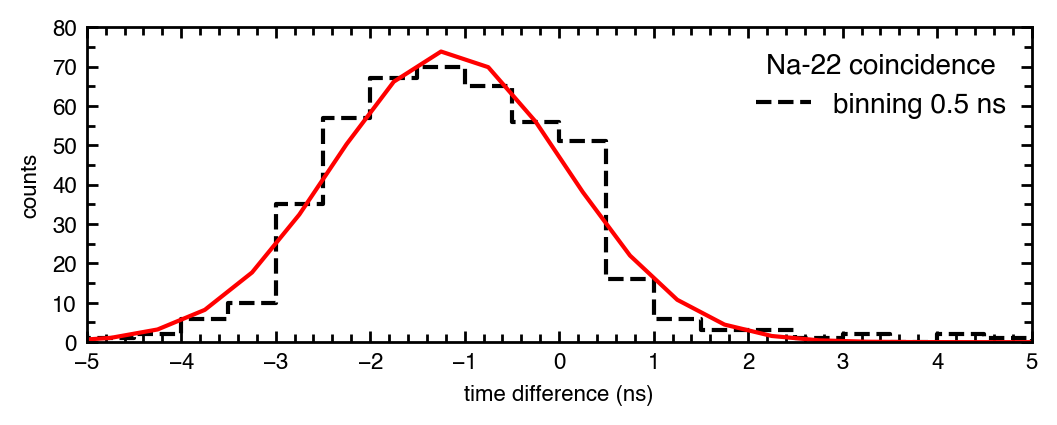

In [ ]:
fig = fig_pre_def(12,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bar_x_05ns,bar_y_05ns     ,'--k' ,alpha = 1,label='binning 0.5 ns')
plt.plot(bin_center_05ns,gauss_y_05ns,'r')

#plt.plot(bar_x_05ns,bar_y_05ns   ,'r' ,label='binning 0.5 ns')
#plt.plot(bar_x_02ns,bar_y_02ns   ,'g' ,label='binning 0.2 ns')
#plt.plot(bar_x_01ns,bar_y_01ns   ,'k' ,label='binning 0.1 ns')


fig_post_def(xlim=(-5,5),xticks=(1,0.2)
             ,ylim=(0,80),yticks=(10,5)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22 coincidence')


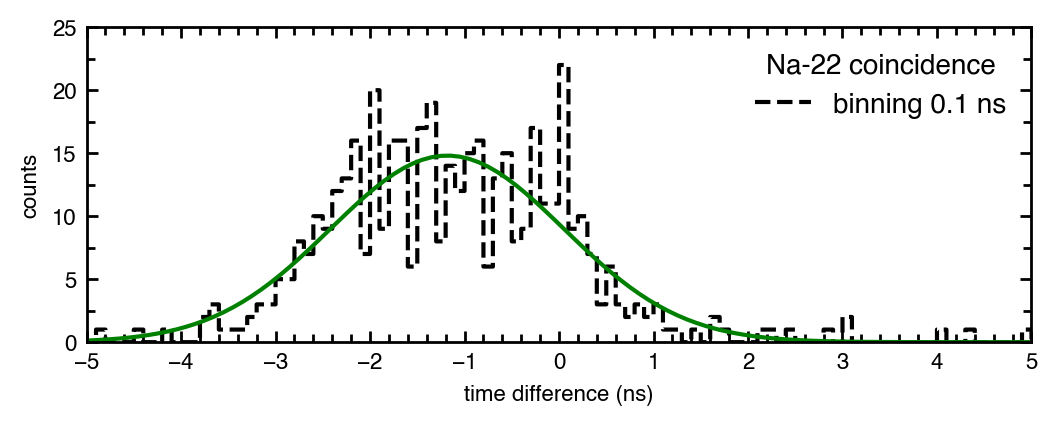

In [ ]:
fig = fig_pre_def(12,4,1)# 圖片大小
ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格

plt.plot(bar_x_01ns,bar_y_01ns     ,'--k' ,alpha = 1,label='binning 0.1 ns')
plt.plot(bin_center_01ns,gauss_y_01ns,'g')

#plt.plot(bar_x_05ns,bar_y_05ns   ,'r' ,label='binning 0.5 ns')
#plt.plot(bar_x_02ns,bar_y_02ns   ,'g' ,label='binning 0.2 ns')
#plt.plot(bar_x_01ns,bar_y_01ns   ,'k' ,label='binning 0.1 ns')


fig_post_def(xlim=(-5,5),xticks=(1,0.2)
             ,ylim=(0,25),yticks=(5,2.5)
             ,lg_fs=10,ylabel="counts",xlabel="time difference (ns)",title ='Na-22 coincidence')


time center :  1.6688978749655765
sigma =  1.4258769625569854   FWHM =  3.3579402468217006


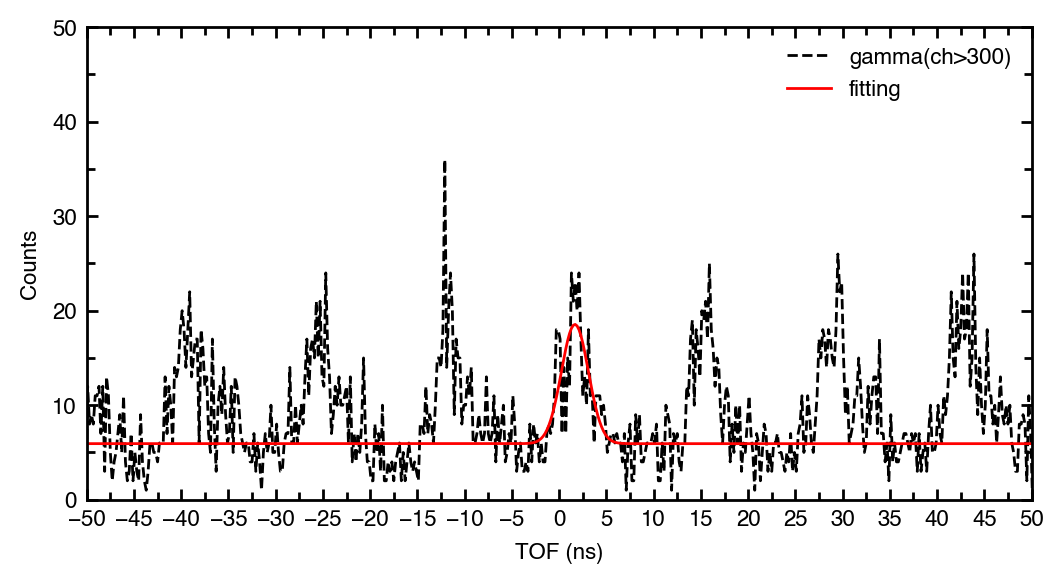

In [ ]:
fig = fig_pre_def(12,6)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 
time_calibration = 0


fig_post_def(xlim =(-50,50)
             ,xticks=(5,2.5)
             ,ylim = (0,50),yticks=(10,5)
             ,lg_fs=8,xlabel = 'TOF (ns)',ylabel = 'Counts')
print('time center : ', popt[1])

print('sigma = ', abs(popt[2]), '  FWHM = ', 2.355* abs(popt[2]) )
